# Application: Graphs using sparse matrices

While we used adjacency lists to store our graphs previously, it is also possible to
use *adjancency matrices*. For an unweighted graph with vertices $V,E$, the adjancency
matrix $A$ is of size $|V|$-by-$|V|$, and entries $A_{ij}=1$ if the graph has an edge
from vertex $i$ to vertex $j$, otherwise zero.

These can be stored conveniently using Julia's sparse matrices. Note that the actual
implementation using the CSC format is quite similar to the adjancency list. However,
insertion of new edges (and vertices) is still very expensive.

As an example, we create the same graph as used in the section on graph algorithms.
Since the CSC format stores non-zeros column-by-column, we use the transpose $A^T$
instead of $A$ itself. This makes it faster to find all the neighbors of a vertex,
by finding the non-zeros in a column (instead of a row).

![graph1.png](graph1.png "Example graph")

In [1]:
using PyPlot, SparseArrays, LinearAlgebra # Packages used

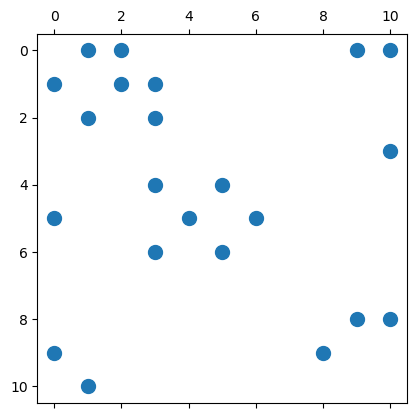

In [2]:
rows = [1,1,1,2,2,2,3,3,4,4,4,4,5,6,6,7,9,10,10,11,11,11]
cols = [2,10,6,3,1,11,1,2,5,3,2,7,6,7,5,6,10,1,9,1,4,9]
AT = sparse(cols, rows, 1, 11, 11)   # Use transpose, better for finding neighbors
spy(AT, marker=".", markersize=20);

To illustrate how to use this adjacency matrix, we repeat the DFS algorithm.
The main operation is the loop over all neighbors of `ivertex`, which are given
by the locations of the non-zeros in a column: `findall(AT[:,ivertex])`.

In [3]:
function sparse_dfs(AT, start)
    visited = falses(size(AT,1))
    function visit(ivertex)
        visited[ivertex] = true
        println("Visiting vertex #$ivertex")
        for nb in findall(AT[:,ivertex] .!= 0)
            if !visited[nb]
                visit(nb)
            end
        end
    end
    visit(start)
    return nothing
end

sparse_dfs (generic function with 1 method)

In [4]:
sparse_dfs(AT, 1)

Visiting vertex #1
Visiting vertex #2
Visiting vertex #3
Visiting vertex #11
Visiting vertex #4
Visiting vertex #5
Visiting vertex #6
Visiting vertex #7
Visiting vertex #9
Visiting vertex #10
